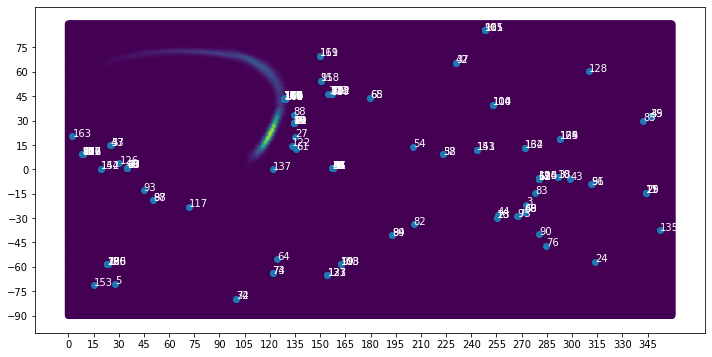

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
probmap = pd.read_csv('probmap.csv')

df = pd.DataFrame()
file = open('data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes
df = df[df['mode'] == 'PHOTON'].sort_values(by=['start time'])

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticks(np.arange(0, 360, 15))
ax.set_yticks(np.arange(-90, 90, 15))
ax.scatter(probmap['ra'], probmap['dec'], c=probmap['prob'])
ax.scatter(df['ra'], df['dec'])
for i in np.arange(df.shape[0]):
    ax.annotate(i, (df['ra'].tolist()[i], df['dec'].tolist()[i]), color='white')

In [5]:
subset

,targetid,obsid,ra,dec,start time,mode
687,7003916,07003916004,128.836250,43.487778,2017-06-08 19:27:28.4,PHOTON
188,7003917,07003917001,129.114583,43.693611,2017-06-08 19:27:53.6,PHOTON
189,7003918,07003918001,129.049583,43.552222,2017-06-08 19:30:13.8,PHOTON
193,7003919,07003919001,129.100000,43.300833,2017-06-08 19:32:31.6,PHOTON
270,7003920,07003920001,128.574167,43.402222,2017-06-08 19:34:46.4,PHOTON
97,7003919,07003919001,129.100000,43.300833,2017-06-08 20:34:20.2,PHOTON
677,7003919,07003919001,129.100000,43.300833,2017-06-08 21:05:14.4,PHOTON
220,7003920,07003920001,128.574167,43.402222,2017-06-08 21:05:45.8,PHOTON
241,7003918,07003918001,129.049583,43.552222,2017-06-08 21:07:38.4,PHOTON
242,7003917,07003917001,129.114583,43.693611,2017-06-08 21:09:20,PHOTON


In [4]:
from shutil import copyfile
import os
subset = df[(df.ra<135) & (df.ra>120) & (df.dec > 37) & (df.dec < 50)]

c = 0
for i, row in subset.iterrows():
    targetid = row['targetid']
    dirs = os.listdir('.')
    for dir in dirs:
        if str(targetid) in dir:
            files = os.listdir(dir+'/xrt/event/')
            for file in files:
                if 'pc' in file and 'cl' in file:
                    copyfile(dir+'/xrt/event/'+file, 'events/'+str(c)+'_'+dir+'_'+file)
                    print(dir+'_'+file+'_'+str(c))
                    c += 1

07003917001_sw07003917001xpcw3po_cl.evt.gz_0
07003918001_sw07003918001xpcw3po_cl.evt.gz_1
07003919001_sw07003919001xpcw3po_cl.evt.gz_2
07003920001_sw07003920001xpcw3po_cl.evt.gz_3
07003919001_sw07003919001xpcw3po_cl.evt.gz_4
07003919001_sw07003919001xpcw3po_cl.evt.gz_5
07003920001_sw07003920001xpcw3po_cl.evt.gz_6
07003918001_sw07003918001xpcw3po_cl.evt.gz_7
07003917001_sw07003917001xpcw3po_cl.evt.gz_8
07003920001_sw07003920001xpcw3po_cl.evt.gz_9
07003918001_sw07003918001xpcw3po_cl.evt.gz_10
07003917001_sw07003917001xpcw3po_cl.evt.gz_11
07003917001_sw07003917001xpcw3po_cl.evt.gz_12
07003920001_sw07003920001xpcw3po_cl.evt.gz_13
07003917001_sw07003917001xpcw3po_cl.evt.gz_14
07003920001_sw07003920001xpcw3po_cl.evt.gz_15
07003919001_sw07003919001xpcw3po_cl.evt.gz_16
07003920001_sw07003920001xpcw3po_cl.evt.gz_17
07003917001_sw07003917001xpcw3po_cl.evt.gz_18
